In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
sales = pd.read_csv('SuperMarketSalesData.csv')
sales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [6]:
sales.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [7]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [25]:
sales['date'] = pd.to_datetime(sales['Date'])
sales['day'] = (sales['date']).dt.day
sales['month'] = (sales['date']).dt.month
sales['year'] = (sales['date']).dt.year

In [26]:
sales['Time'] = pd.to_datetime(sales['Time'])
sales['Hour'] = (sales['Time']).dt.hour

In [27]:
sales['Hour'].nunique()

11

In [28]:
sales['Hour'].unique()

array([13, 10, 20, 18, 14, 11, 17, 16, 19, 15, 12], dtype=int32)

In [29]:
sales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,Payment,cogs,gross margin percentage,gross income,Rating,date,day,month,year,Hour
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,...,Ewallet,522.83,4.761905,26.1415,9.1,2019-01-05,5,1,2019,13
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,...,Cash,76.40,4.761905,3.8200,9.6,2019-03-08,8,3,2019,10
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,...,Credit card,324.31,4.761905,16.2155,7.4,2019-03-03,3,3,2019,13
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,...,Ewallet,465.76,4.761905,23.2880,8.4,2019-01-27,27,1,2019,20
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,...,Ewallet,604.17,4.761905,30.2085,5.3,2019-02-08,8,2,2019,10


In [30]:
catColumns = [cname for cname in sales.columns if sales[cname].dtype == "object"]
catColumns

['Invoice ID',
 'Branch',
 'City',
 'Customer type',
 'Gender',
 'Product line',
 'Date',
 'Payment']

In [43]:
len(sales['Rating'].unique().tolist())
sales['Rating'].unique()

array([ 9.1,  9.6,  7.4,  8.4,  5.3,  4.1,  5.8,  8. ,  7.2,  5.9,  4.5,
        6.8,  7.1,  8.2,  5.7,  4.6,  6.9,  8.6,  4.4,  4.8,  5.1,  9.9,
        6. ,  8.5,  6.7,  7.7,  7.5,  7. ,  4.7,  7.6,  7.9,  6.3,  5.6,
        9.5,  8.1,  6.5,  6.1,  6.6,  5.4,  9.3, 10. ,  6.4,  4.3,  4. ,
        8.7,  9.4,  5.5,  8.3,  7.3,  4.9,  4.2,  9.2,  7.8,  5.2,  9. ,
        8.8,  6.2,  9.8,  9.7,  5. ,  8.9])

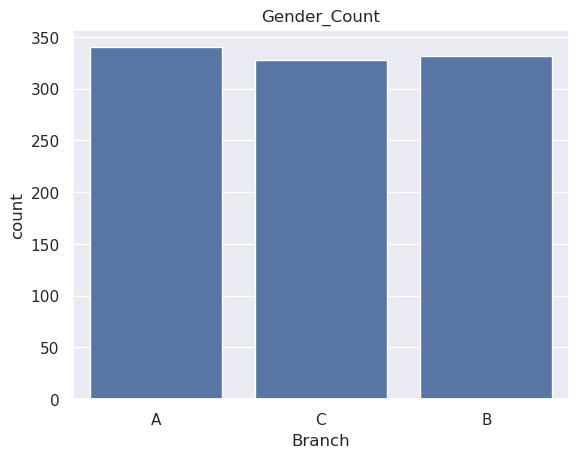

In [36]:
sns.set(style="darkgrid")
genderCount  = sns.countplot(x="Gender", data =sales).set_title("Gender_Count")

Text(0.5, 1.0, 'Ratings by Branch')

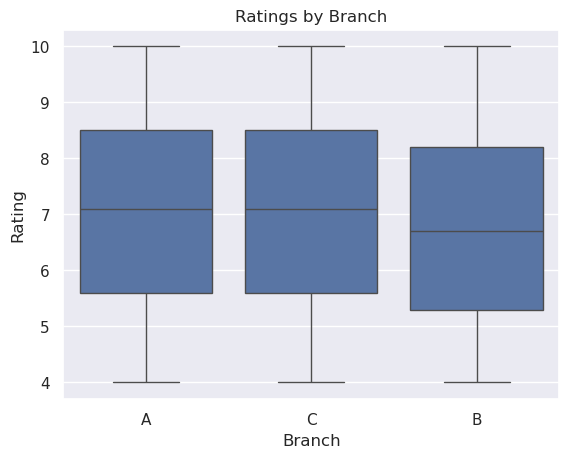

In [37]:
sns.boxplot(x="Branch", y = "Rating" ,data =sales).set_title("Ratings by Branch")

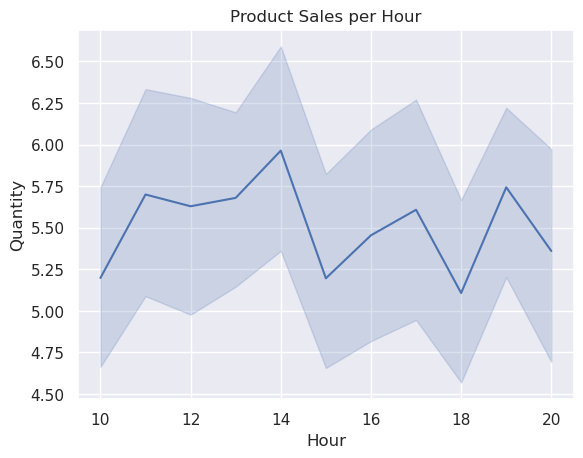

In [38]:
genderCount  = sns.lineplot(x="Hour",  y = 'Quantity',data =sales).set_title("Product Sales per Hour")

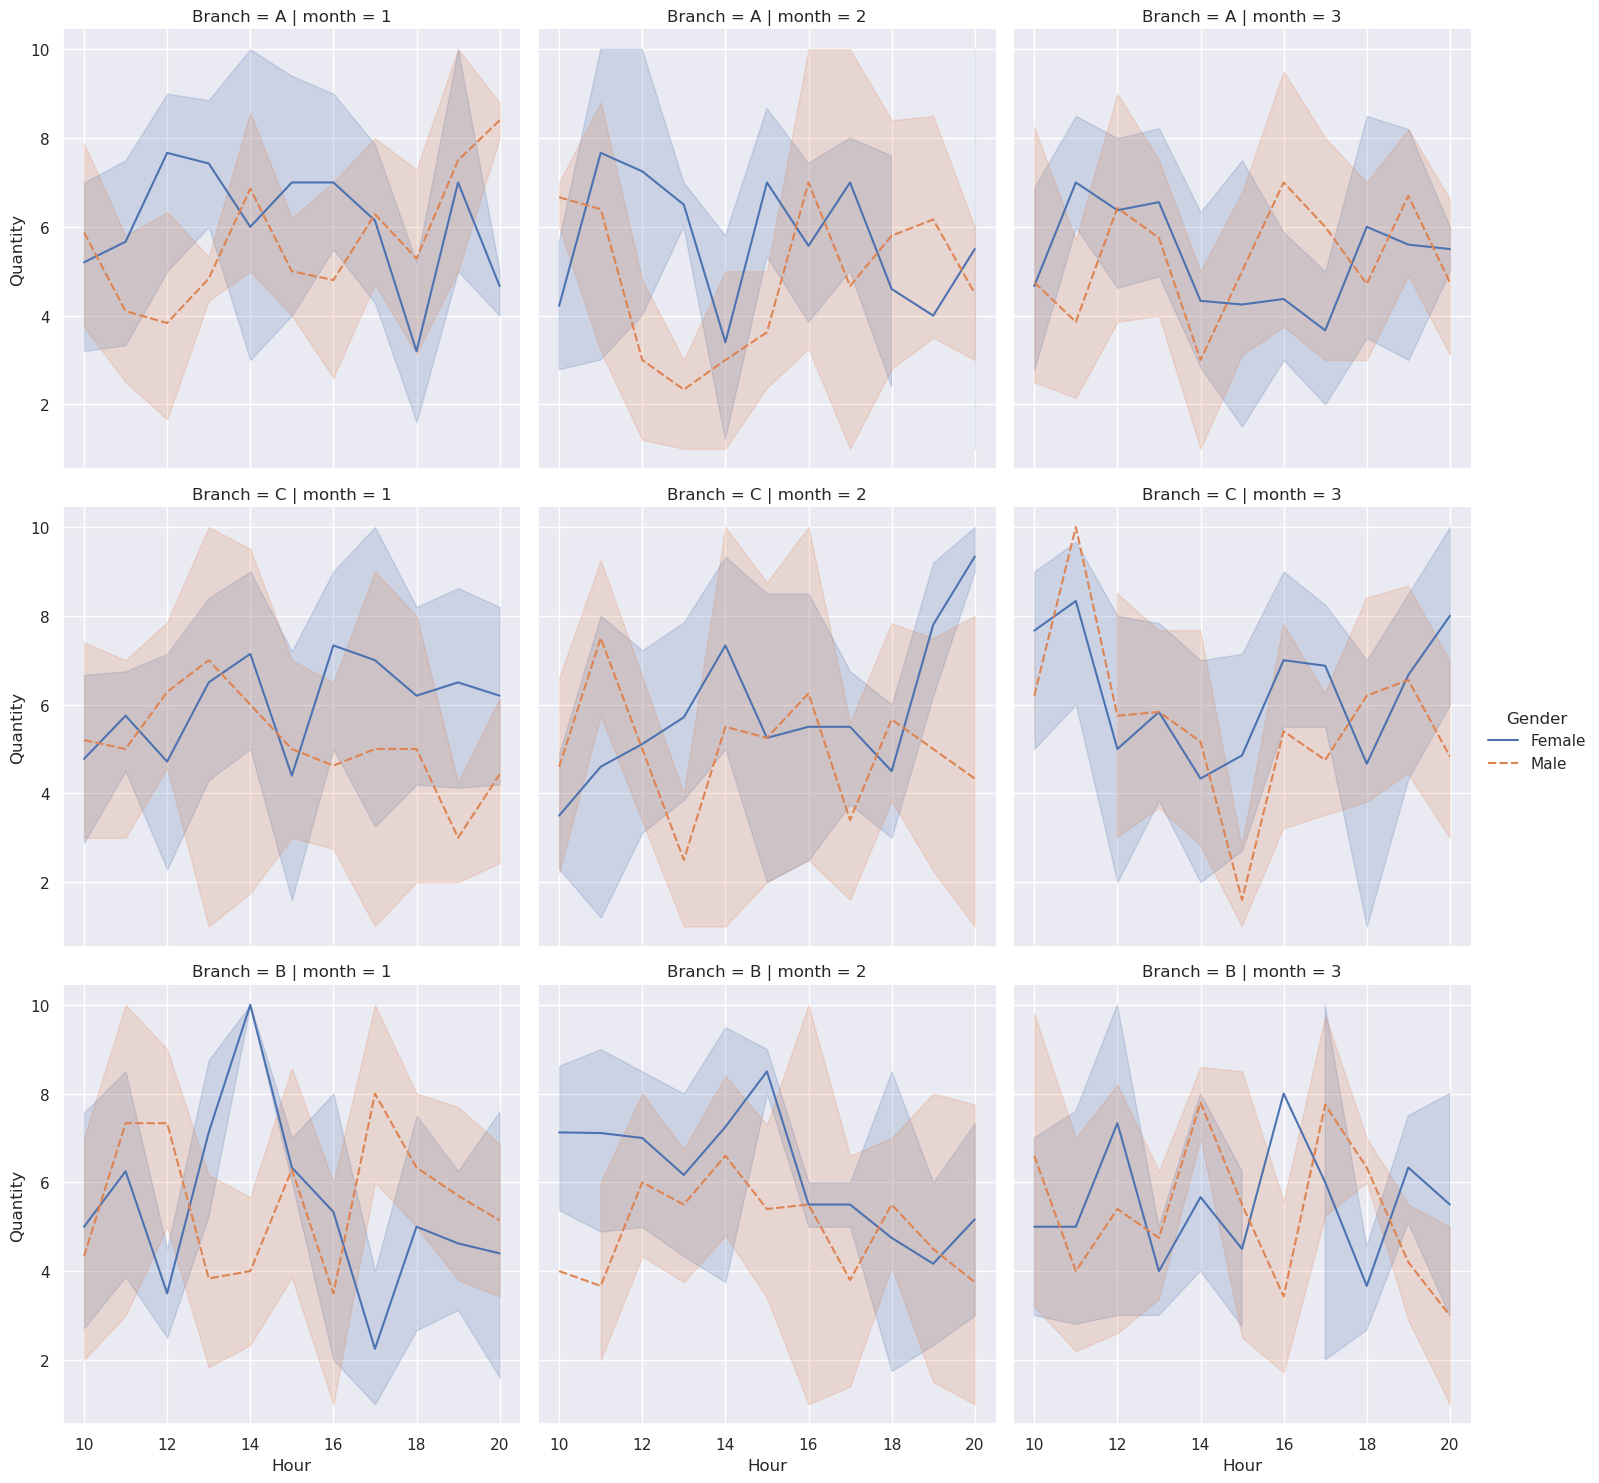

In [40]:
genderCount  = sns.relplot(x="Hour",  y = 'Quantity', col= 'month' , row= 'Branch', kind="line", hue="Gender", style="Gender", data =sales)

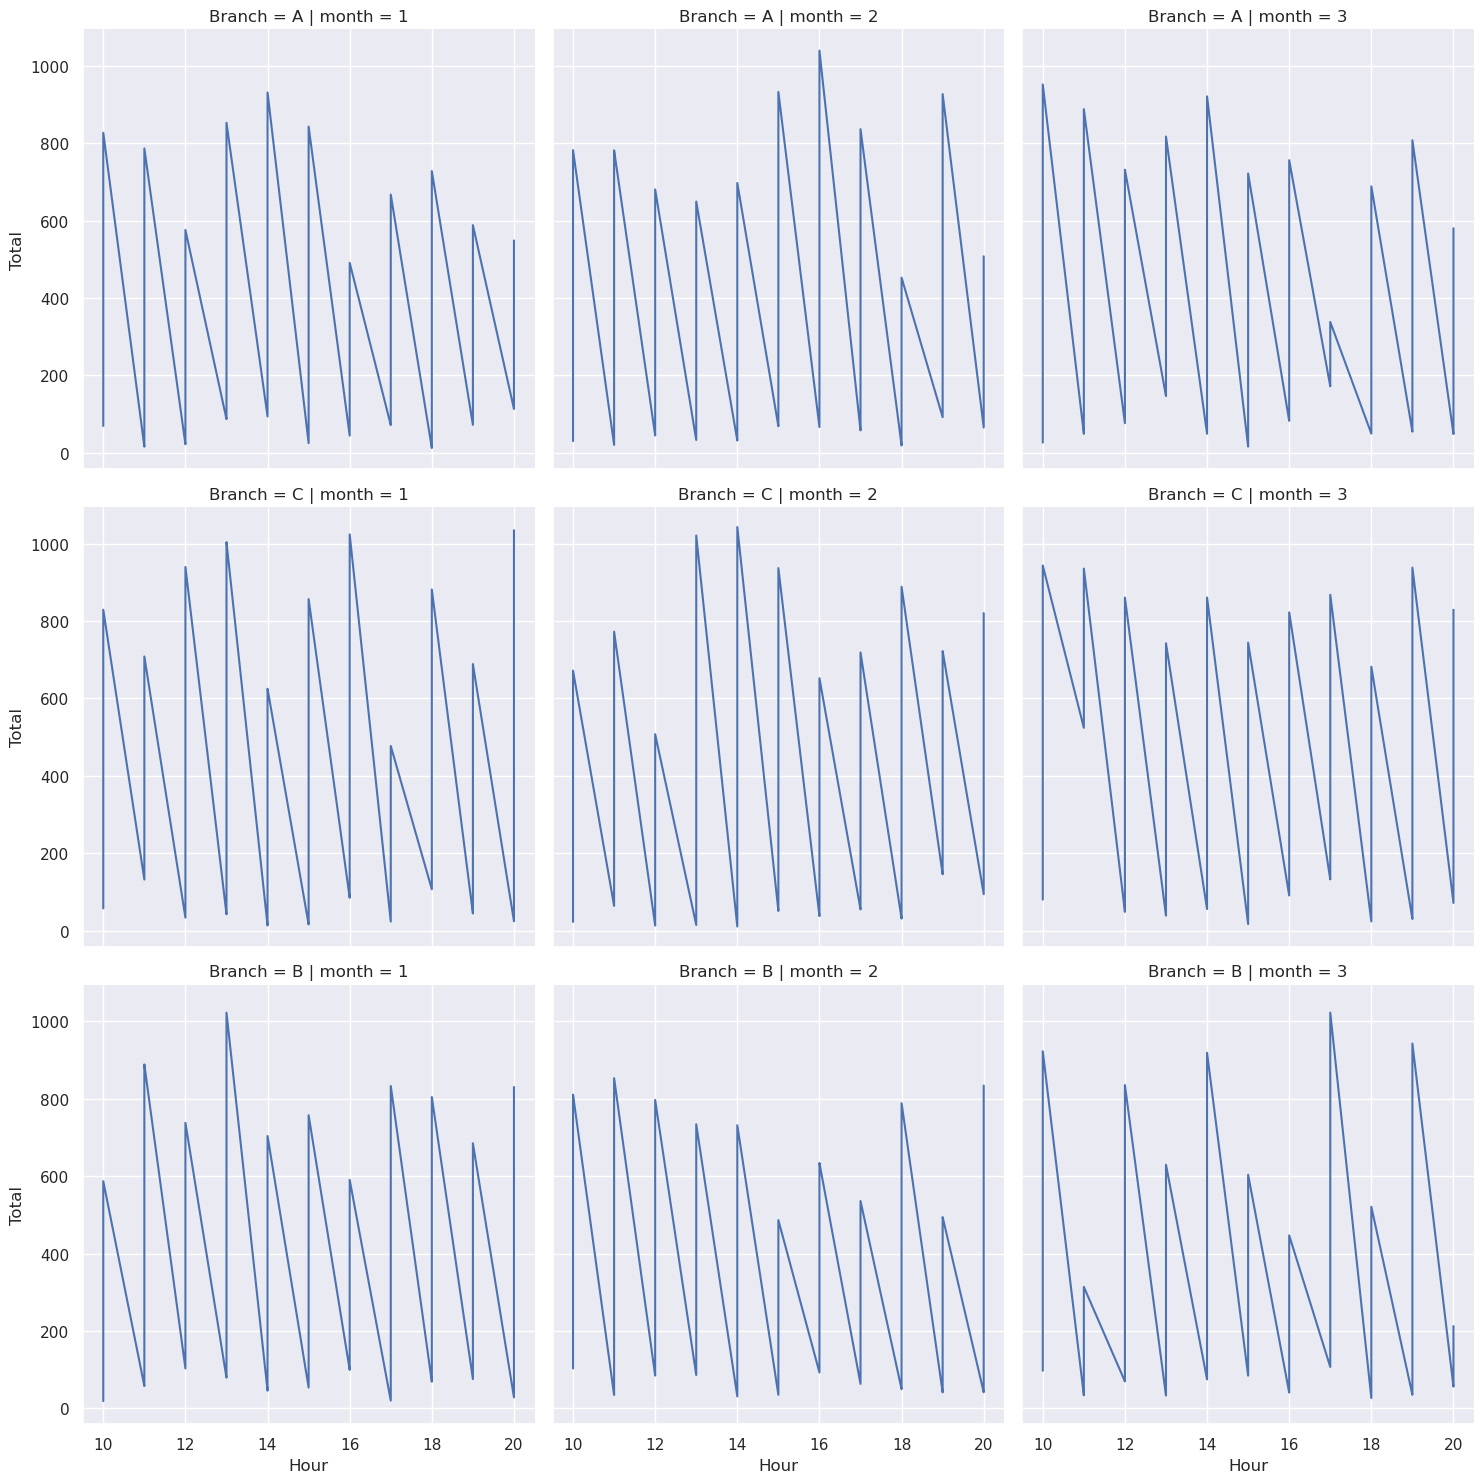

In [41]:
genderCount  = sns.relplot(x="Hour",  y = 'Total', col= 'month' , row= 'Branch', estimator = None, kind="line", data =sales)

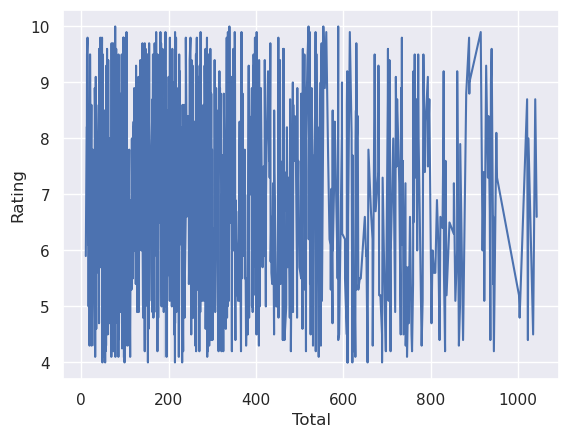

In [44]:
ageDisSpend = sns.lineplot(x="Total", y = "Rating", data =sales)

<AxesSubplot: xlabel='Quantity', ylabel='Product line'>

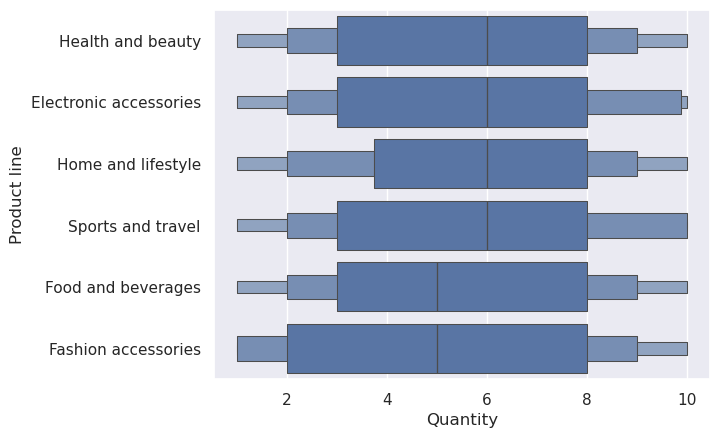

In [45]:
sns.boxenplot(y = 'Product line', x = 'Quantity', data=sales )

<AxesSubplot: xlabel='count', ylabel='Product line'>

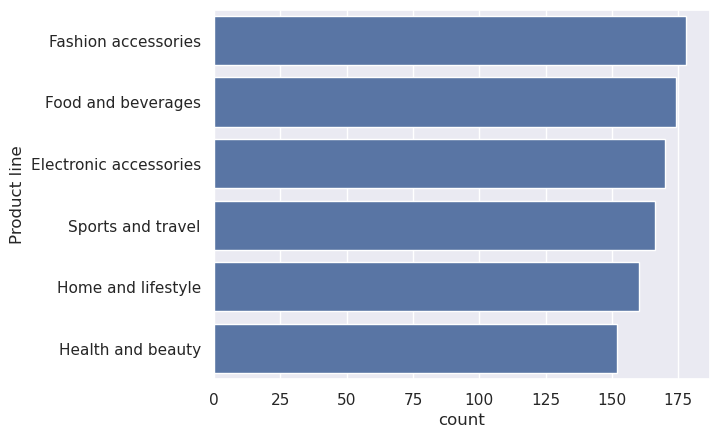

In [46]:
sns.countplot(y = 'Product line', data=sales, order = sales['Product line'].value_counts().index )

<AxesSubplot: xlabel='Total', ylabel='Product line'>

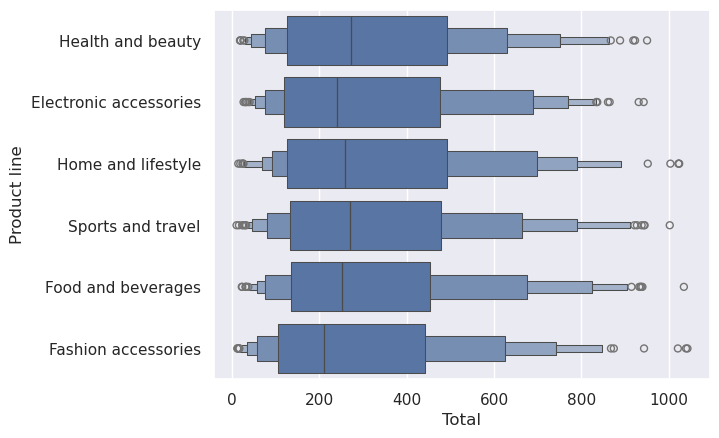

In [48]:
sns.boxenplot(y = 'Product line', x = 'Total', data=sales )

<AxesSubplot: xlabel='Total', ylabel='Product line'>

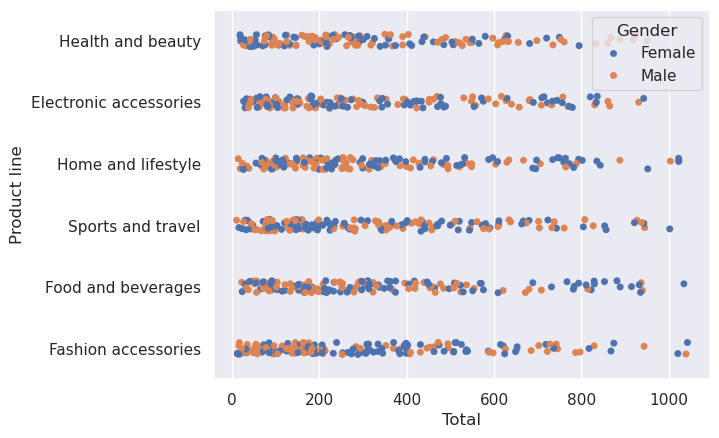

In [49]:
sns.stripplot(y = 'Product line', x = 'Total', hue = 'Gender', data=sales )

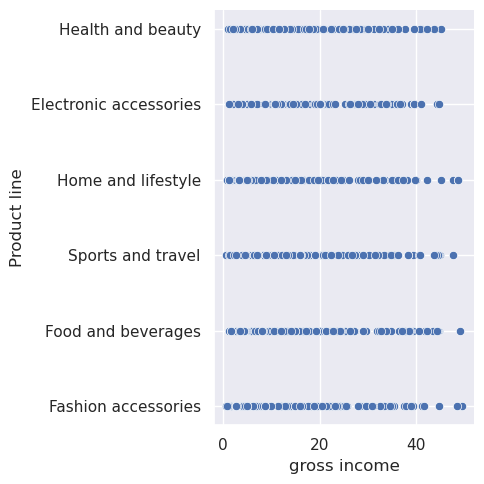

In [50]:
sns.relplot(y = 'Product line', x = 'gross income', data=sales )

<AxesSubplot: xlabel='Rating', ylabel='Product line'>

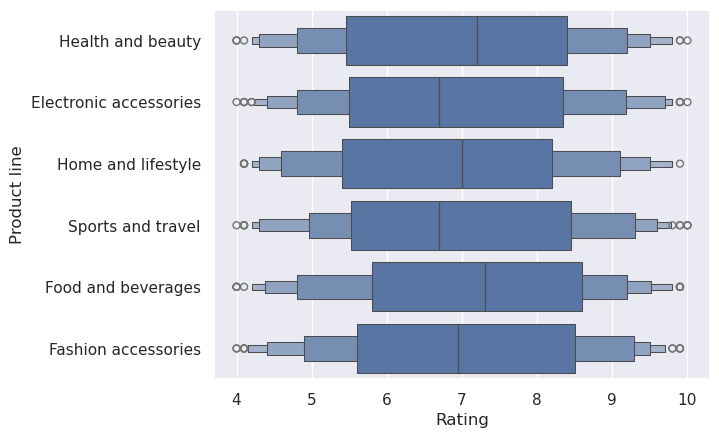

In [51]:
sns.boxenplot(y = 'Product line', x = 'Rating', data=sales )

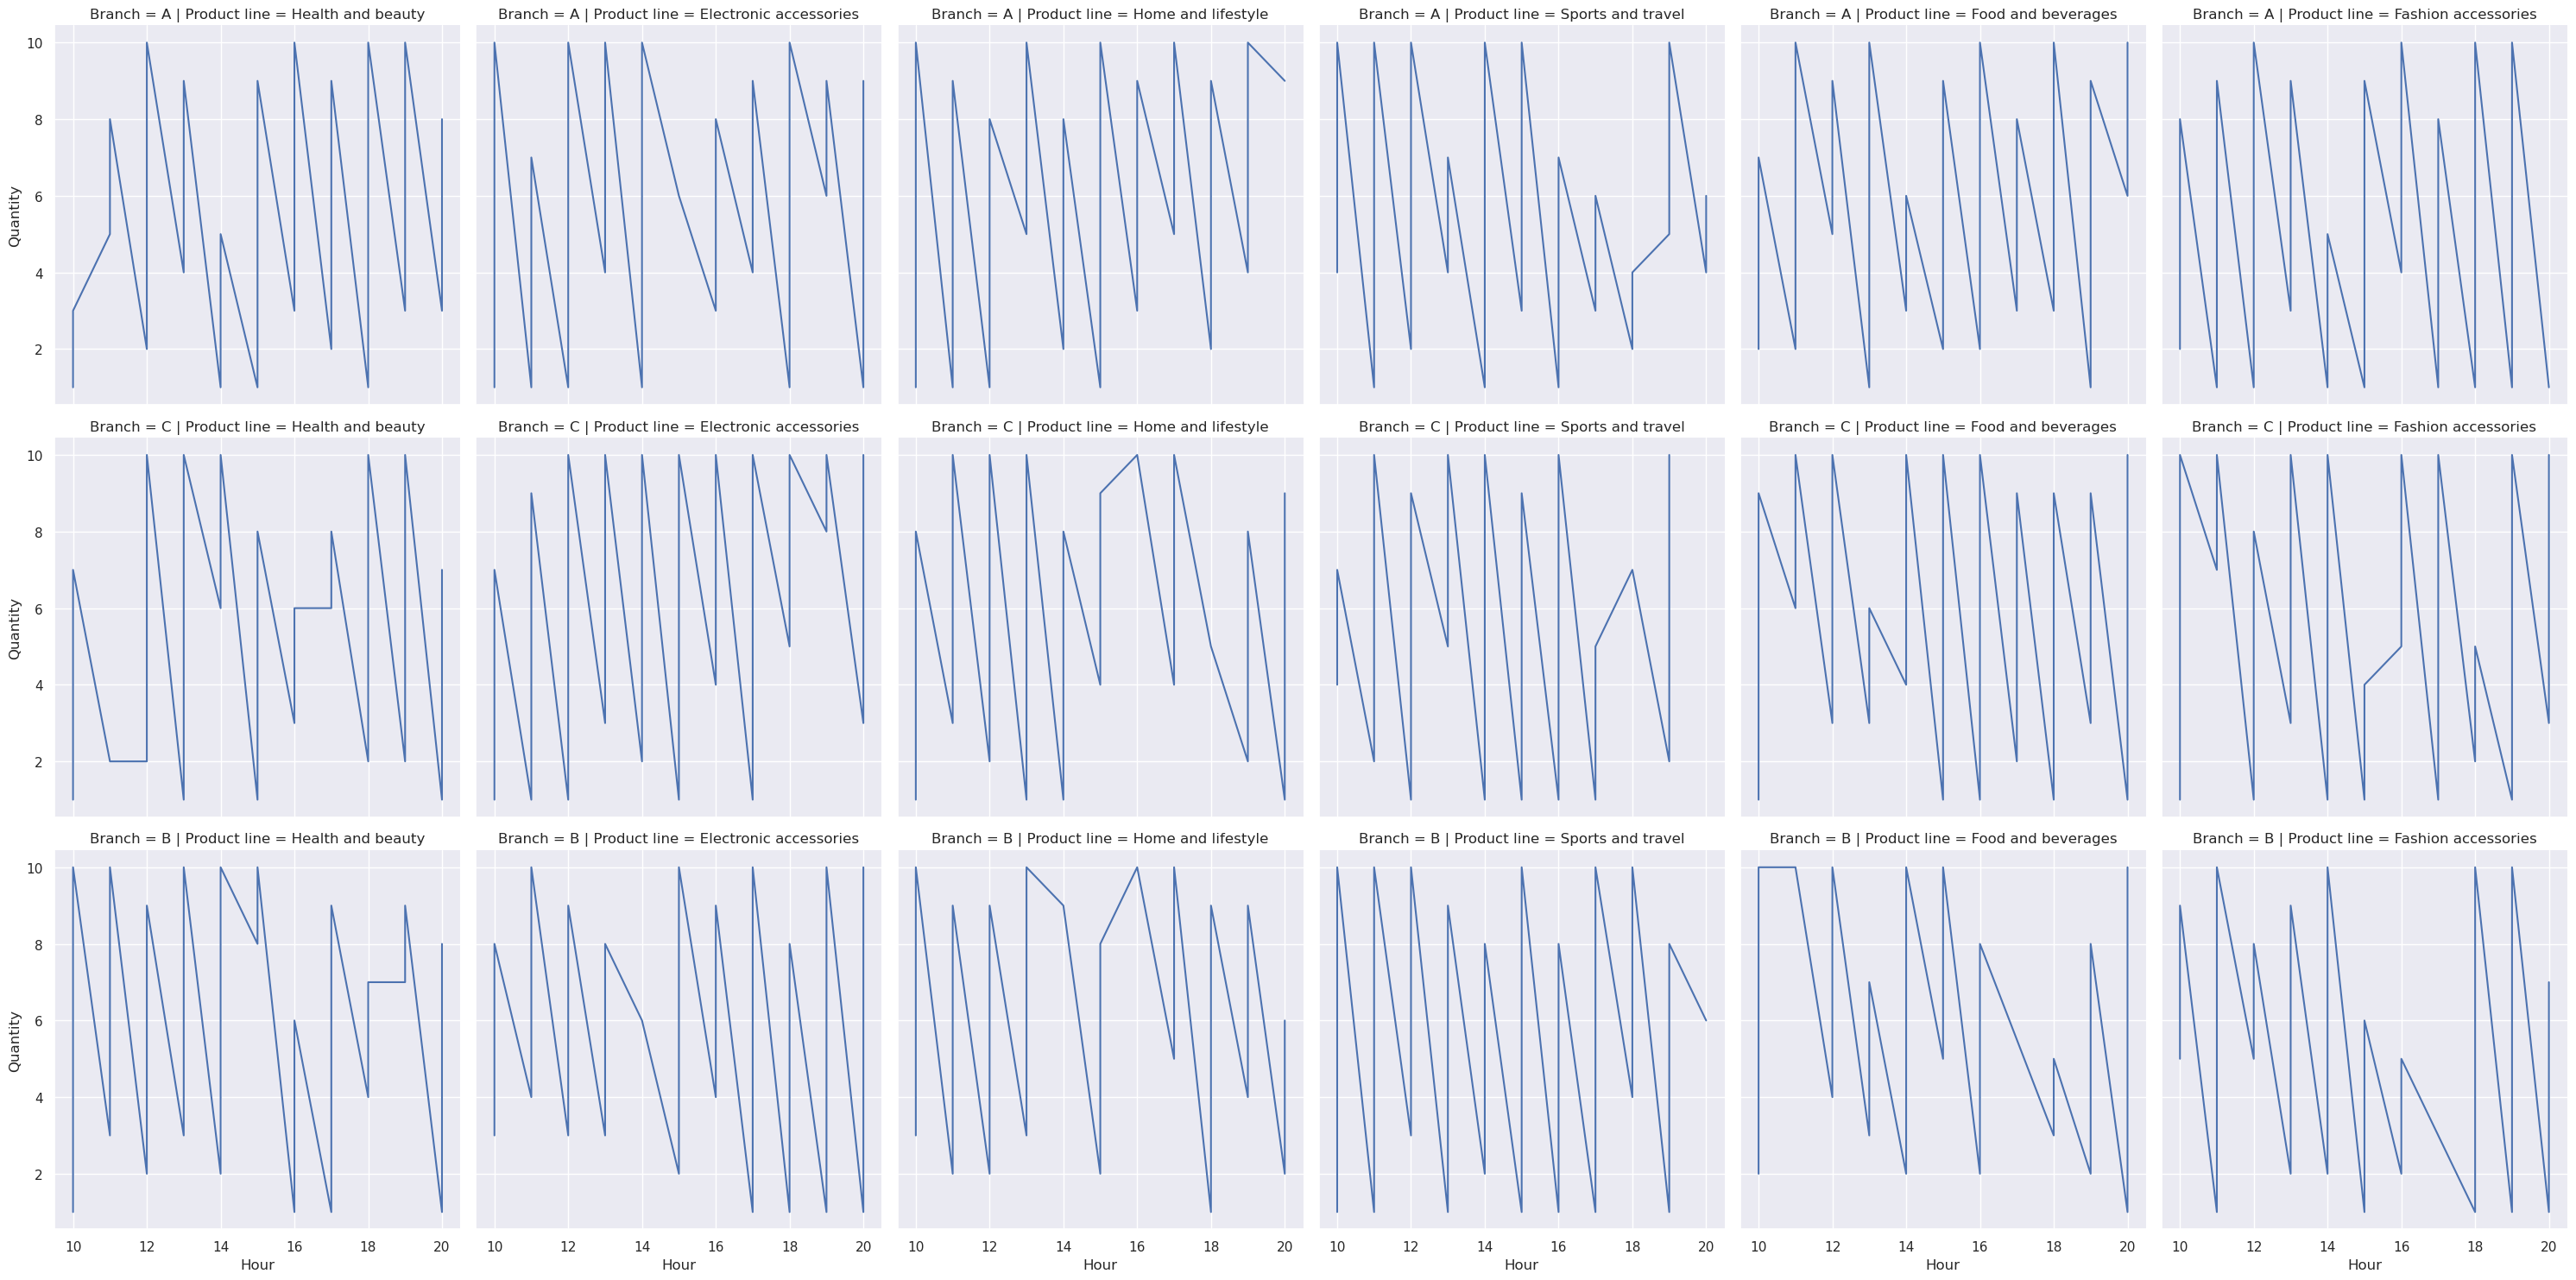

In [52]:
productCount  = sns.relplot(x="Hour",  y = 'Quantity', col= 'Product line' , row= 'Branch', estimator = None, kind="line", data =sales)

Text(0.5, 1.0, 'Payment Channel')

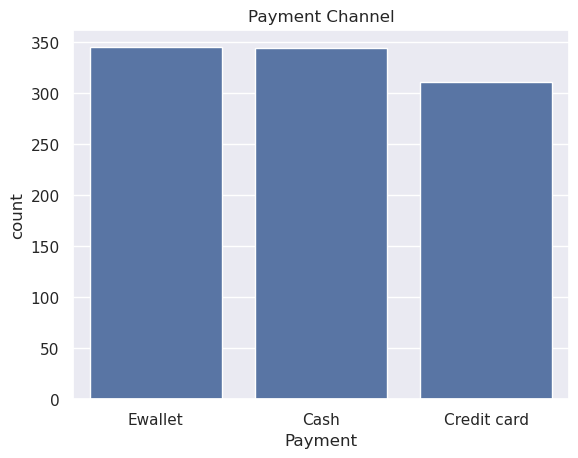

In [53]:
 sns.countplot(x="Payment", data =sales).set_title("Payment Channel") 

Text(0.5, 1.0, 'Payment Channel by Branch')

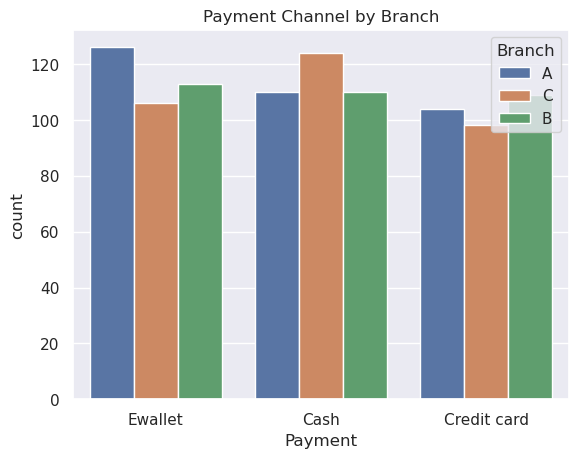

In [54]:
 sns.countplot(x="Payment", hue = "Branch", data =sales).set_title("Payment Channel by Branch") 

Text(0.5, 1.0, 'Customer Type')

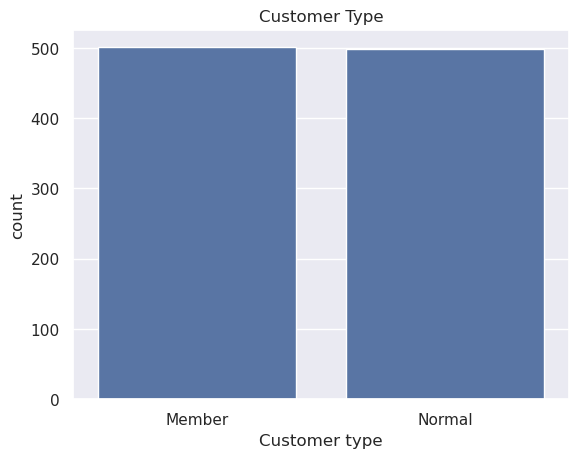

In [57]:
sales['Customer type'].nunique()
sns.countplot(x="Customer type", data =sales).set_title("Customer Type") 

Text(0.5, 1.0, 'Customer Type by Branch')

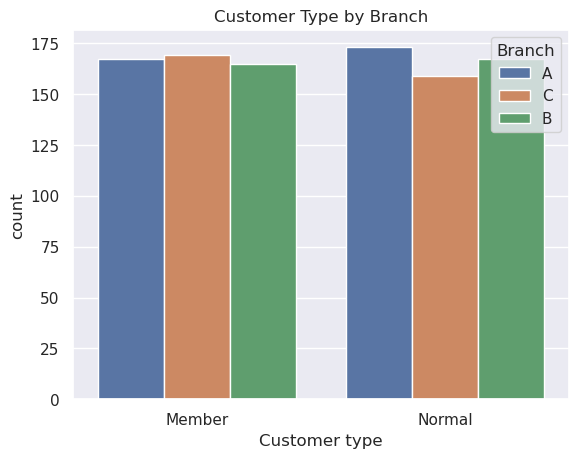

In [58]:
 sns.countplot(x="Customer type", hue = "Branch", data =sales).set_title("Customer Type by Branch") 

<AxesSubplot: xlabel='Customer type', ylabel='Total'>

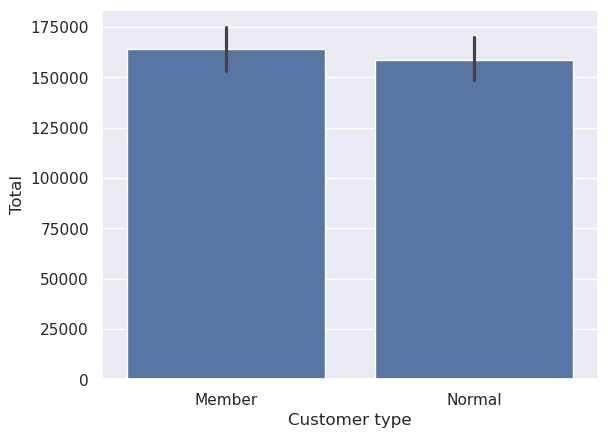

In [59]:
sns.barplot(x="Customer type", y="Total", estimator = sum, data=sales)

Text(0.5, 1.0, 'Customer Type')

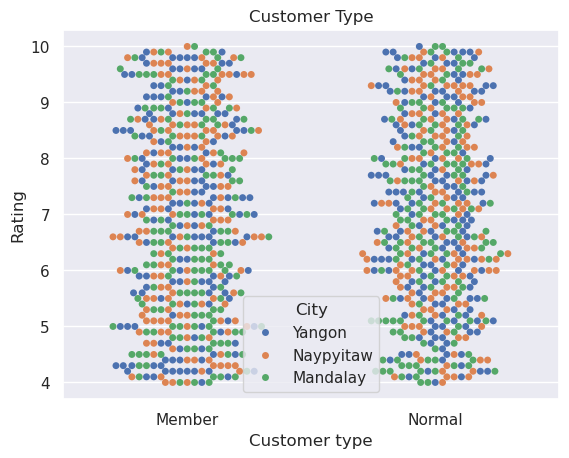

In [60]:
 sns.swarmplot(x="Customer type",  y = "Rating",  hue = "City", data =sales).set_title("Customer Type") 

In [63]:
long = {"Yangon": 16.8661, "Naypyitaw": 19.7633, "Mandalay": 21.9588 }
lat = {"Yangon": 96.1951, "Naypyitaw": 96.0785, "Mandalay": 96.0891 }
for set in sales:
    sales['long'] = sales['City'].map(long)
    sales['lat'] = sales['City'].map(lat)

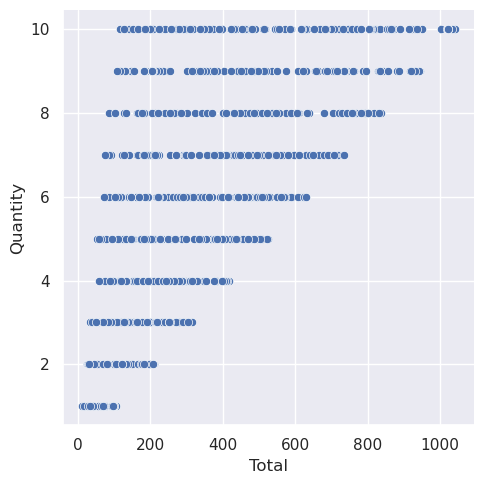

In [62]:
sns.relplot(x="Total",  y = "Quantity", data =sales)